# Import data

In [1]:
from Utils.Toolkit import TestGen, DataReader
from Utils.Toolkit import TestSplit
import numpy as np

dataReader = DataReader()

# Very high sparsity

In [2]:
URM = DataReader().URM_COO()
sparsity = URM.getnnz() / (URM.shape[0] * URM.shape[1])
sparsity

0.0006972830778968816

# Cold users

In [3]:
URM = URM.tocsr()
cold_users_list = []

cold_users = 0
for i in range(len(URM.indptr)-1):
    if URM.indptr[i+1]-URM.indptr[i] == 0:
        cold_users_list.append(i)
        cold_users += 1

print(f'Total users: {len(URM.indptr)}')
print(f'Cold users: {cold_users}')
print(f'Percentage of cold users: {cold_users/len(URM.indptr)*100:.2f}%\t ')
print(f'First 10 cold users: {cold_users_list[:10]}')

Total users: 30912
Cold users: 3656
Percentage of cold users: 11.83%	 
First 10 cold users: [20, 23, 24, 26, 41, 42, 46, 48, 67, 68]


# Cold items

In [4]:
URM = URM.tocsc()
cold_items_list = []

cold_users = 0
for i in range(len(URM.indptr)-1):
    if URM.indptr[i+1]-URM.indptr[i] == 0:
        cold_items_list.append(i)
        cold_users += 1

print(f'Total items: {len(URM.indptr)}')
print(f'Cold items: {cold_users}')
print(f'Percentage of cold items: {cold_users/len(URM.indptr)*100:.2f}%')
print(f'First 10 cold items: {cold_items_list[:10]}')

Total items: 18496
Cold items: 3218
Percentage of cold items: 17.40%
First 10 cold items: [1, 3, 8, 14, 15, 16, 24, 26, 27, 31]


# Cold users in our target

In [5]:
numer_of_cold_target_users = np.sum(np.isin(np.arange(URM.shape[0]), cold_users_list))
print(f'Number of cold users in target: {numer_of_cold_target_users}')
print(f'Percentage: {numer_of_cold_target_users/URM.shape[0]*100:.2f}%')

Number of cold users in target: 3656
Percentage: 11.83%


# See users with K interactions

In [6]:
users_rated = np.zeros((URM.shape[1],), dtype=int)

URM = URM.tocsr()

for i in range(len(URM.indptr)-1):
    num_of_interaction_in_row = URM.indptr[i+1] - URM.indptr[i]
    users_rated[num_of_interaction_in_row] += 1

for i in range(10):
    if users_rated[i] != 0:
        print(f'{users_rated[i]} have {i} interactions')

3656 have 0 interactions
2817 have 1 interactions
1919 have 2 interactions
1776 have 3 interactions
1658 have 4 interactions
1469 have 5 interactions
1429 have 6 interactions
1230 have 7 interactions
1128 have 8 interactions
923 have 9 interactions


# Let's divide in bigger groups

In [7]:
first_groups = np.arange(0, 11, 5)
second_groups = np.arange(20, 100, 10)
groups = np.append(first_groups, second_groups)

for i in range(len(groups) - 1):
    print(f'{groups[i]:4} < i < {groups[i+1]:3}: {np.sum(users_rated[groups[i]:groups[i+1]]):6} -> {np.sum(users_rated[groups[i]:groups[i+1]])/URM.shape[0]*100:.2f}%')

   0 < i <   5:  11826 -> 38.26%
   5 < i <  10:   6179 -> 19.99%
  10 < i <  20:   6377 -> 20.63%
  20 < i <  30:   2966 -> 9.60%
  30 < i <  40:   1512 -> 4.89%
  40 < i <  50:    839 -> 2.71%
  50 < i <  60:    487 -> 1.58%
  60 < i <  70:    262 -> 0.85%
  70 < i <  80:    155 -> 0.50%
  80 < i <  90:     93 -> 0.30%


# Plot some items stuff

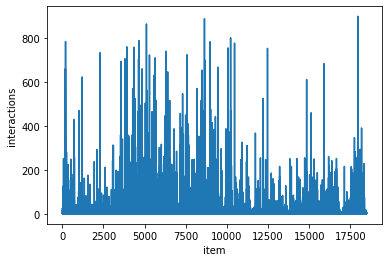

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
y_axis = []
x_axis = np.arange(URM.shape[1])
URM = URM.tocsc()

for i in range(len(URM.indptr)-1):
    value = URM.indptr[i+1]-URM.indptr[i]
    y_axis.append(value)

plt.plot(x_axis, y_axis)
plt.xlabel('item')
plt.ylabel('interactions')
plt.show()

# ---------------------------------------------------------------------------------
# ICMs

In [24]:
ICM_asset = DataReader().ICM_asset_COO()
ICM_price = DataReader().ICM_price_COO()
ICM_subclass = DataReader().ICM_subclass_COO()
print(ICM_asset.shape)
print(ICM_price.shape)
print(ICM_subclass.shape)

(18495, 1)
(18495, 1)
(18495, 2011)


# ICM asset

In [10]:
print(f'Sparsity {ICM_asset.getnnz() / (ICM_asset.shape[0]*ICM_asset.shape[1])*100:.2f}%')

Sparsity 99.97%


# ICM price

In [11]:
print(f'Sparsity {ICM_price.getnnz() / (ICM_price.shape[0]*ICM_price.shape[1])*100:.2f}%')

Sparsity 99.99%


# ICM subclass

In [12]:
print(f'Sparsity {ICM_subclass.getnnz() / (ICM_subclass.shape[0]*ICM_subclass.shape[1])*100:.2f}%')

Sparsity 0.05%


# ---------------------------------------------------------------------------------
# UCMs

In [25]:
UCM_region = DataReader().UCM_region_COO()
UCM_age = DataReader().UCM_age_COO()
print(UCM_region.shape)
print(UCM_age.shape)

(18495, 1)
(18495, 1)


# UCM region
#### Since sparsity is very high we can make good use of this data in a UserContentBasedRec

In [22]:
print(f'Sparsity {UCM_region.getnnz() / (UCM_region.shape[0]*UCM_region.shape[1])*100:.2f}%')

Sparsity 99.99%


# UCM age
#### Since sparsity is very high we can make good use of this data in a UserContentBasedRec

In [23]:
print(f'Sparsity {UCM_age.getnnz() / (UCM_age.shape[0]*UCM_age.shape[1])*100:.2f}%')

Sparsity 99.99%
